How strong is Magnus? Should teams ban Magnus in ti10 competition?

Yizhou Li

Dota 2 (Defense of the Ancients 2) was designed by IceFrog and published by Valve in 2013. It was originally a game mode for Blizzard Entertainment's Warcraft III: Reign of Chaos. It was one of the greatest video games in all times, and it was rated high by IGN: 9.4/10, GameSpot: 9/10, etc. As I was writting this document in May/2 7:00 pm, there were still around 361,449 players playing this game.

<img src="files/steam_stats.png" width="800" height="400">

Dota 2 is a type of MOBA (multiplayer online battle arena) game. There are two sides in Dota 2, one is called Dire, which always appeared at upper right corner of the map. The other is called Radiant, which always appeared at lower left corner of the map. There are 10 player in total, and they will be randomly assigned as 5 players in Dire and 5 players in Radiant. Before the match started, players need to pick a hero to control. Generally, heroes are classified by role of carry, mid, tank, support. In order to win the game, players should have all these roles in their teams and cooperate with each other. Although sometimes players can win with only one or two roles in their teams, the best practices of winning the game is to have all of the roles. Heores can have the same roles, but each heores are unique. The have their unique skills, damage, health, strong period, etc. After picking a hero, the players will see the map like this:

<img src="files/map.png" width="800" height="400">

As the map shows, there are three roads leading to opposite team's base. Every 30 seconds, creeps will spawn in both team's base follow three routes to attack. players can choose one route, and follow creeps to attack the other team. However, the enemy heroes controled by enemy team, and enemy creeps and defense towers will slow down your pace of attacking. To destroy enemy team's base, you have to use strength of your hero, and try to kill enemy players and creeps to accumulate experience and gold. More experience and gold will strength your skill, and allow you to purchase more pwerful items at your base. In the end, one team will destroy the other team's base, and the game is over.

As a pro Dota player with 1500h+ play time and 5 years game experience, I am deeply interested in heros' gameplay strategy, lineup matching, and winning percentage against different heroes. Recently, I paid special attention to Magnus, which is a hero charactrized by high strength, able to hard-locking down on enemy heroes, and an great initiator. Why do I analyze this hero? It's because in TI 10 (The International is the biggest annual event hosted by Valve. It gathers top ranking Dota teams around the world to compete in this championship, and it has total prize pool of 40 million dollars funded by Dota 2 comunity) final match PSG.LGD vs Team Spirit, Magnus was picked 4 times, and there were only 5 matches in total. So many great and decisive moments were created as Magnus played by Team Spirit. It's the Magnus' long lasting ulitimate and blink dagger pushing enemies back made Team Spirit chamipion of the Ti10.

<img src="files/Dota2_TI10_Magnus.jpeg" width="800" height="400">

<img src="files/Screen Shot 2022-05-03 at 5.32.06 PM.png" width="800" height="400">

Dota 2 official site: https://www.dota2.com/home
Dota 2 Steam store site: https://store.steampowered.com/app/570/Dota_2/
Dota 2 Wikipedia: https://en.wikipedia.org/wiki/Dota_2
Dota 2 Reddit: https://www.reddit.com/r/DotA2/
Introduction of Magnus: https://dota2.fandom.com/wiki/Magnus

Now, let's begin analyse. We want to know in recent matches what's the general win rate of Magnus in different ranks? Comparing to other heroes, how good was Magnus?

In [31]:
# To gather related data, we use opendota api (a api famous for statistical analysis in Dota 2)
# and python requests to get the data back.
# opendota link: https://www.opendota.com/
# api docs: https://docs.opendota.com/
import requests
import json
link = 'https://api.opendota.com/api/heroStats'
r = requests.get(link)
data = json.loads(r.text)

# We use json library to parse returned json objects, and recompile the information into pandas dataframe.
import pandas as pd
df = pd.DataFrame(data)

# Clean and reformat the dataframe, so we only see data related to our task.
df = df[["localized_name", "1_pick", "1_win", "2_pick", "2_win", "3_pick", "3_win", "4_pick", "4_win",
"5_pick", "5_win", "6_pick", "6_win", "7_pick", "7_win", "8_pick", "8_win"]]

# Rename ranking
df = df.rename(columns={"localized_name":"Heroes", "1_pick":"Herald picks", "1_win":"Herald wins",
                        "2_pick":"Guardian picks", "2_win":"Guardian wins", "3_pick":"Crusader picks",
                        "3_win":"Crusader wins", "4_pick":"Archon picks", "4_win":"Archon wins",
                        "5_pick":"Legend picks", "5_win":"Legend wins", "6_pick":"Ancient picks",
                        "6_win":"Ancient wins", "7_pick":"Divine picks", "7_win":"Divine wins",
                        "8_pick":"Immortal picks", "8_win":"Immortal wins"})
all_hero_wp_df = df.copy()
magnus_df = df[df["Heroes"] == "Magnus"]
magnus_df.reset_index(inplace=True, drop=True)
magnus_df.head()

,Heroes,Herald picks,Herald wins,Guardian picks,Guardian wins,Crusader picks,Crusader wins,Archon picks,Archon wins,Legend picks,Legend wins,Ancient picks,Ancient wins,Divine picks,Divine wins,Immortal picks,Immortal wins
0,Magnus,8230,3804,19042,8799,27462,12909,24454,11587,14598,7158,6792,3241,3212,1530,977,467


Generally speaking, players with Herald, Guardian, or Crusader titles are newbies. Players with Archon, Legend, or Ancient titles are medium players. Players with Divine or Immortal titles are pro players. Next, we will calculate the win rate of Magnus in different player rankings, and plot a few graph to visualize the results.

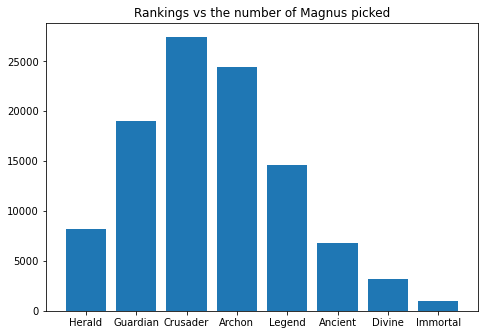

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald picks"], magnus_df.at[0, "Guardian picks"], magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon picks"], magnus_df.at[0, "Legend picks"], magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine picks"], magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks,v)
ax.set_title("rankings vs the number of Magnus picked")
plt.show()

Wait! Do people in Crusader pick Magnus the most simply because most of the Dota 2 players are concentrated in Crusader? For the sake of simplicity, I screen shooted Dota 2 players' distribution across different ranks. For most of the time, I think this reflect the players' distribution well across different time periods.

<img src="files/Screen Shot 2022-05-03 at 7.59.35 PM.png" width="800" height="400">

As you see, most of the players are concentrated in Archon, but players in Crusader has most of the Magnus picked. So the first conclusion we have is people love to play Magnus in Crusader. Now, let's explore the win rate of picking Magnus in different ranks.

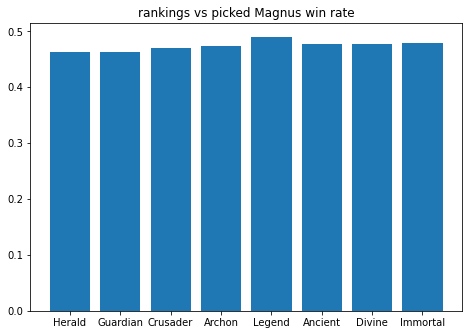

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ranks = ['Herald', 'Guardian', 'Crusader', 'Archon', 'Legend', 'Ancient', 'Divine', 'Immortal']
v = [magnus_df.at[0, "Herald wins"]/magnus_df.at[0, "Herald picks"],
     magnus_df.at[0, "Guardian wins"]/magnus_df.at[0, "Guardian picks"],
     magnus_df.at[0, "Crusader wins"]/magnus_df.at[0, "Crusader picks"],
     magnus_df.at[0, "Archon wins"]/magnus_df.at[0, "Archon picks"],
     magnus_df.at[0, "Legend wins"]/magnus_df.at[0, "Legend picks"],
     magnus_df.at[0, "Ancient wins"]/magnus_df.at[0, "Ancient picks"],
     magnus_df.at[0, "Divine wins"]/magnus_df.at[0, "Divine picks"],
     magnus_df.at[0, "Immortal wins"]/magnus_df.at[0, "Immortal picks"]]
ax.bar(ranks,v)
ax.set_title("rankings vs picked Magnus win rate")
plt.show() # td: show exact number? compare jugg low win rate